<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## 15.2 Principal Component Analysis: Theoretical Background and Derivations

#### Example 15.2: Computing the First principal component with Python
Consider a dataset which consists of two-dimensional points, obtained from sampling
a bi-variate normal distribution that is characterized by given mean values and a
covariance matrix:

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

true_mean = np.array([3.1, 0.9])
true_cov = np.array([[0.7, 0.3],
                     [0.3, 0.3]])

rv = multivariate_normal(mean=true_mean, cov=true_cov)
X = rv.rvs(size=150)
X = X - np.mean(X, axis=0)

sample_cov = np.cov(X, rowvar=False)
sample_cov

array([[0.62710645, 0.25046107],
       [0.25046107, 0.24335295]])

From `eig` we obtain eigenvalues and -vectors (also, you might want to consider the use of `eigh`) and can
compute the score values, i.e., the coordinates w.r.t. the first PC:

In [3]:
eigenvals, eigenvecs = np.linalg.eig(sample_cov)
if eigenvals[0] > eigenvals[1]:
    u = eigenvecs[:, 0]
else:
    u = eigenvecs[:, 1]
    
c = X @ u

Last but not least, we visualize the original data and the projected data:

[[]]

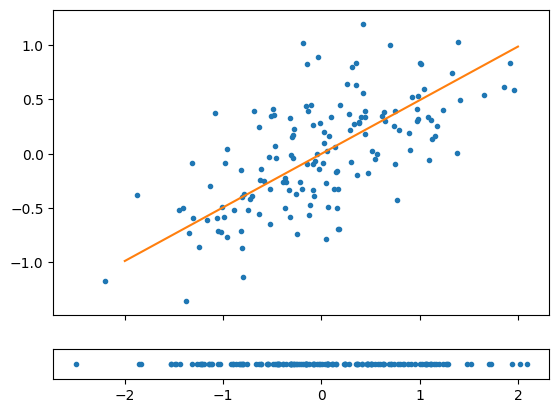

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios': [1, 0.1]}, sharex=True)
ax[0].plot(X[:,0], X[:,1], '.')
ax[0].plot([-2, 2], np.array([-2, 2]) * u[1] / u[0])
ax[1].plot(c, np.zeros_like(c), '.')
ax[1].set(yticks=[])